In [116]:
import pandas as pd
import geopandas as gpd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
# Load the crime data
df_crime = pd.read_csv('Crimes_-_2001_to_Present (1).csv')
crimes = df_crime[df_crime['Year'].isin([2008,2009,2010,2011,2012])] # For faster processing
crimes = crimes.dropna()
crimes = crimes.reset_index(drop=True)
crimes['Community Area'] = crimes['Community Area'].astype(str).astype(float).astype(int)

# Group the crime data by community area and count the number of crimes
crime_counts = crimes.groupby('Community Area')['ID'].count().reset_index()
crime_counts = crime_counts.rename(columns={'ID': 'Crime Count'})

In [132]:
# Filter the original DataFrame for violent crimes only
violent_crimes = crimes[crimes['Primary Type'].isin(['HOMICIDE'])]

# Group the violent crimes by community area and year, and count the number of crimes
violent_crimes_by_community = violent_crimes.groupby(['Community Area'])['ID'].count().reset_index()
violent_crimes_by_community.rename(columns={'ID': 'Violent Crime Count'}, inplace=True)
violent_crimes_by_community['Community Area'] = violent_crimes_by_community['Community Area'].astype(float).astype(int)

In [133]:
# Load the community area shapefile
community_areas = gpd.read_file('Boundaries - Community Areas (current).geojson')
community_areas = community_areas.rename(columns={'area_num_1': 'Community Area'})
community_areas['Community Area'] = community_areas['Community Area'].astype(str).astype(int)

In [134]:
# Load the socioeconomic data
socioeconomic = pd.read_csv('Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv')
socioeconomic = socioeconomic.dropna()
socioeconomic = socioeconomic.reset_index(drop=True)
socioeconomic = socioeconomic.rename(columns={'Community Area Number': 'Community Area'})
socioeconomic['Community Area'] = socioeconomic['Community Area'].astype(str).astype(float).astype(int)
# Read in the socioeconomic data
socioeconomic = socioeconomic[['Community Area', 'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 'PERCENT AGED 16+ UNEMPLOYED', 'PER CAPITA INCOME ', 'PERCENT AGED UNDER 18 OR OVER 64', 'PERCENT OF HOUSING CROWDED']]

In [135]:
#Merges

# Merge the crime data with the community area shapefile
community_areas_crime = community_areas.merge(crime_counts, on='Community Area', how='left')

# Merge the new DataFrame with community_areas_crime
community_areas_crime = community_areas_crime.merge(violent_crimes_by_community, on=['Community Area'], how='left')

# Merge the socioeconomic data with the community area shapefile
community_areas_socioeconomic = community_areas_crime.merge(socioeconomic, on='Community Area', how='left')



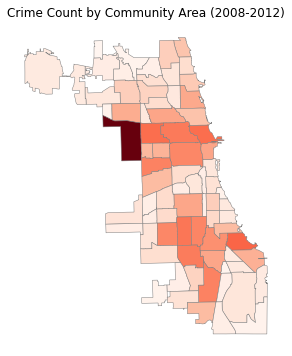

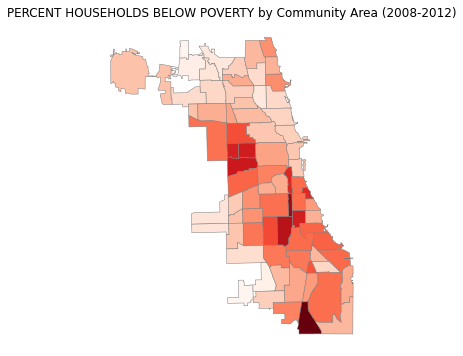

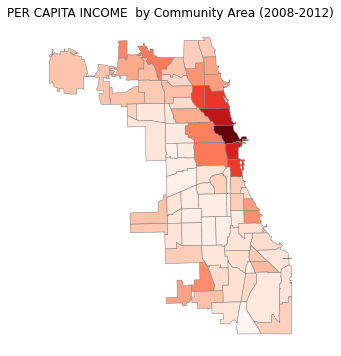

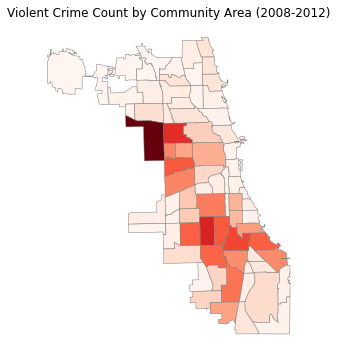

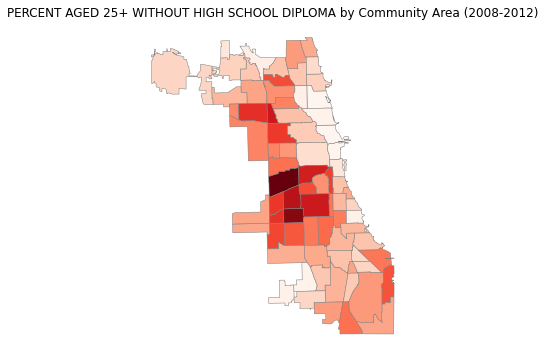

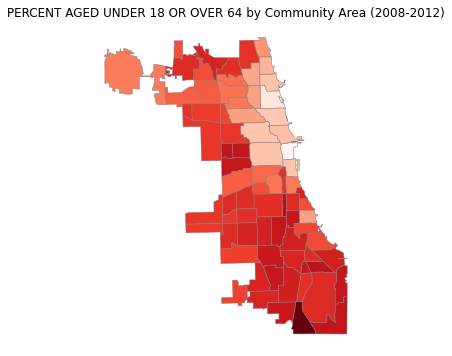

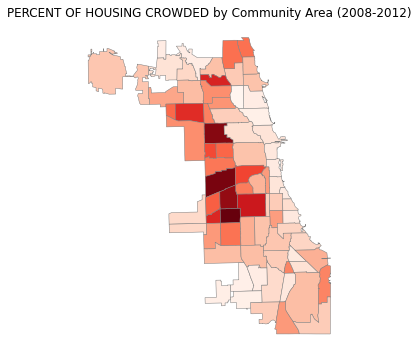

In [141]:
# Define the choropleth map
for i in ['Crime Count', 'PERCENT HOUSEHOLDS BELOW POVERTY', 'PER CAPITA INCOME ', 'Violent Crime Count', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 'PERCENT AGED UNDER 18 OR OVER 64', 'PERCENT OF HOUSING CROWDED']:
    fig, ax = plt.subplots(figsize=(8,6))
    community_areas_socioeconomic.plot(column= i, cmap='Reds', edgecolor='grey', linewidth=0.5, ax=ax)
    ax.axis('off')
    ax.set_title('{} by Community Area (2008-2012)'.format(i))
    plt.savefig("{}.png".format(i))
    plt.show()


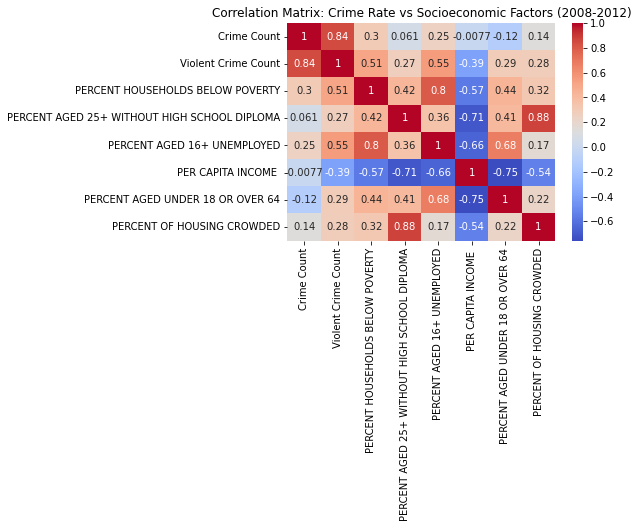

In [142]:
# Compute the correlation coefficients between crime rate and socioeconomic factors
corr = community_areas_socioeconomic[['Crime Count', 'Violent Crime Count', 'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 'PERCENT AGED 16+ UNEMPLOYED', 'PER CAPITA INCOME ', 'PERCENT AGED UNDER 18 OR OVER 64', 'PERCENT OF HOUSING CROWDED']].corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Crime Rate vs Socioeconomic Factors (2008-2012)')
plt.savefig("Correlation_Crime_Socio.png")
plt.show()